# Visualization of radiation of an AGN

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Photon_Ionization import *

In [4]:
distance = np.array([1,2,4,8])
dic = {'alpha':0.1, 'beta':100, 'mdot':1}
col1 = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']
col2 = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']
col3 = ['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f']
col1.reverse()
col2.reverse()
col3.reverse()

In [5]:
Dat = compare(distance, dic)

- Compare the **total fluxes** and **ionization rates** (both primary and secondary)
- $J_{X21}=1$

In [5]:
for i in Dat:
    i.intro()
    print('distance =', i.distance_kpc, 'kpc')
    print('\nTotal Flux:')
    print(inte(i.nu, i.Fnu, lower = 130*1.6021773e-12/h, upper = 6e5*1.6021773e-12/h))
    print(inte(i.nu, i.Fnu_abs, lower = 130*1.6021773e-12/h, upper = 6e5*1.6021773e-12/h))
    print('\nIonization Rate:')
    test(H, He, i)
    print('****************************')
    
print('Standard ionization rate (JX21=0.1) ')
E = np.linspace(1.3e2, 6e8)
print('Total Flux:')
print(quad(lambda epsilon:J21*1e-21*np.power(epsilon/1000.0,-1.5)*4*np.pi/h_eV, 130, 6e5)[0])
print(quad(lambda epsilon:J21*1e-21*np.power(epsilon/1000.0,-1.5)*np.exp(-Tau(epsilon, H, He))*4*np.pi/h_eV, 130, 6e5)[0])
print('\nIonization Rate:')
test(H, He)

************************
alpha =  0.1
beta =  100
mdot =  3.0
************************
distance = 8.0 kpc

Total Flux:
0.013579868788196007
0.0008975722423550573

Ionization Rate:
H -19.576323816282414 -18.874201735430944 -16.86188201385597
He -18.093961739122147 -17.72672978182099 -16.93818363625111
****************************
************************
alpha =  0.1
beta =  100
mdot =  3.0
************************
distance = 4.0 kpc

Total Flux:
0.05431947515278403
0.005236549278356395

Ionization Rate:
H -18.285397580765096 -17.585673841469582 -15.5739445483516
He -16.80702082687574 -16.43922317654312 -15.650321109820867
****************************
************************
alpha =  0.1
beta =  100
mdot =  3.0
************************
distance = 2.0 kpc

Total Flux:
0.2172779006111361
0.04827503441311665

Ionization Rate:
H -17.135718310056728 -16.43828596054142 -14.427124577022552
He -15.661162846275706 -15.29281859003656 -14.503573327817012
****************************
*************

<IPython.core.display.Javascript object>


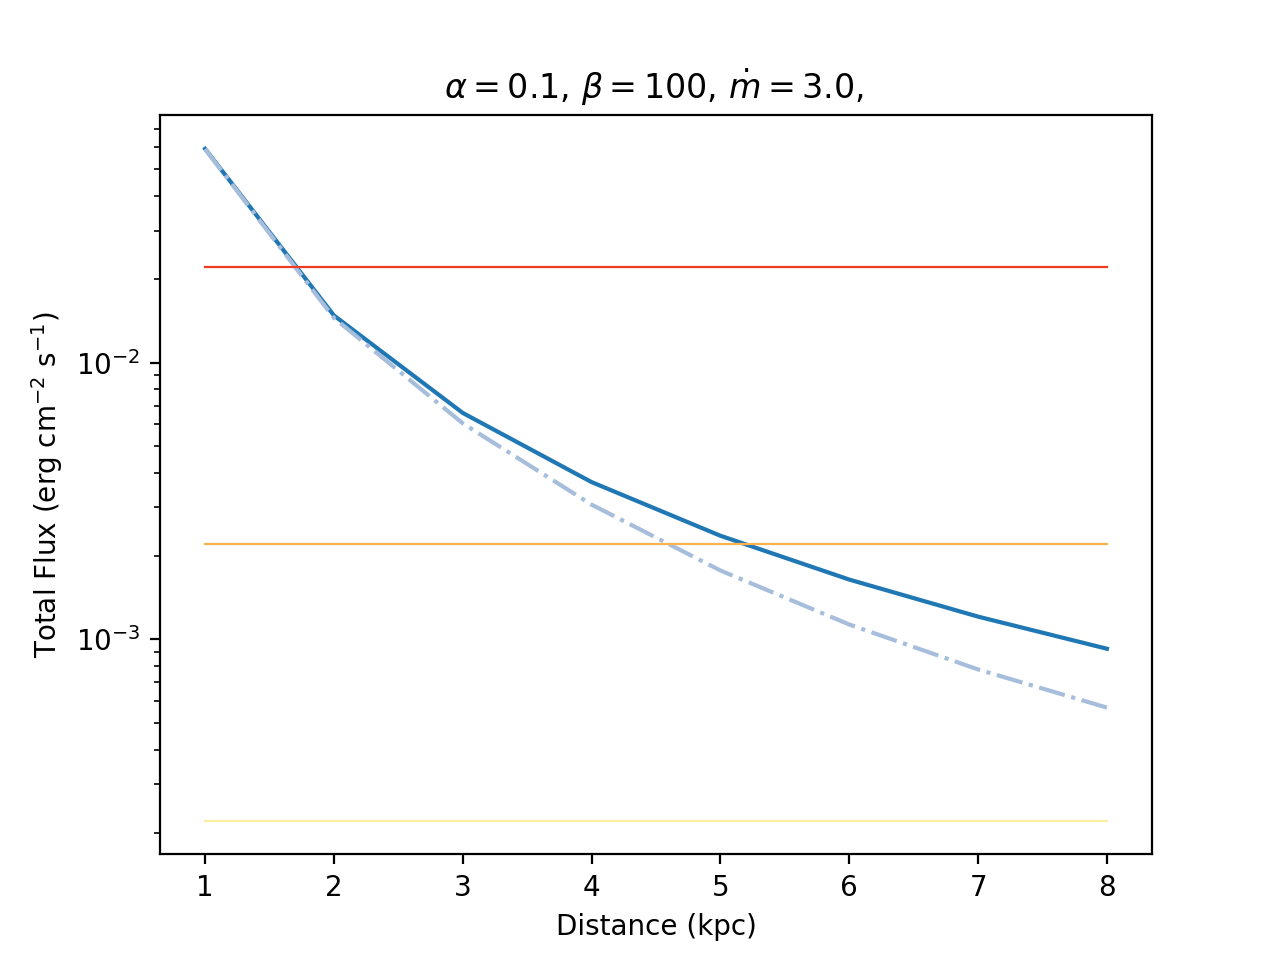

Text(0.5, 1.0, '$\\alpha=$0.1, $\\beta=$100, $\\dot m=$3.0, ')

In [10]:
Dat2 = compare(np.arange(8) + 1, dic)
ip, ip_abs = np.array([]), np.array([])
for i in Dat2:
    ip = np.append(
        inte(i.nu,
             i.Fnu,
             lower=2000 * 1.6021773e-12 / h,
             upper=10000 * 1.6021773e-12 / h), ip)
    ip_abs = np.append(
        inte(i.nu,
             i.Fnu_abs,
             lower=2000 * 1.6021773e-12 / h,
             upper=10000 * 1.6021773e-12 / h), ip_abs)
plt.plot(np.arange(8) + 1, ip)
plt.plot(np.arange(8) + 1, ip_abs, '-.', color='#a6bddb')
ip_model = quad(
    lambda epsilon: 1e-21 * np.power(epsilon / 1000.0, -1.5) * np.exp(-Tau(
        epsilon, H, He)) * 4 * np.pi / h_eV, 2000, 10000)[0]

plt.plot([1, 8], [ip_model / 10, ip_model / 10],
         label='$J_{X21}=0.1$',
         color='#ffeda0',
         lw=0.8)
plt.plot([1, 8], [ip_model, ip_model],
         label='$J_{X21}=1$',
         color='#feb24c',
         lw=0.8)
plt.plot([1, 8], [ip_model * 10, ip_model * 10],
         label='$J_{X21}=10$',
         color='#f03b20',
         lw=0.8)

plt.yscale('log')
plt.xlabel('Distance (kpc)')
plt.ylabel('Total Flux (erg cm$^{-2}$ s$^{-1}$)')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.title(Dat2[0].title(distance=False, alpha=True, beta=True, mdot=True))
#plt.show()

Text(0.5, 1.0, '$\\alpha=$0.1, $\\beta=$100, $\\dot m=$1.0, ')

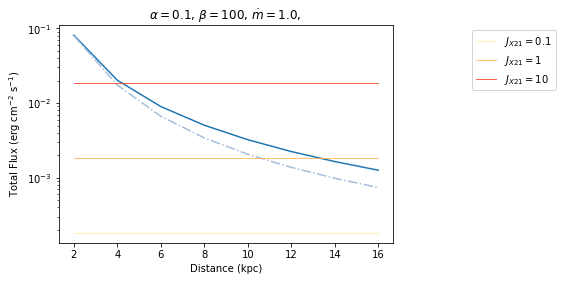

In [17]:
Dat2 = compare((np.arange(8) + 1)*2, dic)  #Jieying
ip, ip_abs = np.array([]), np.array([])
for i in Dat2:
    ip = np.append(
        inte(i.nu,
             i.Fnu,
             lower=2000 * 1.6021773e-12 / h,
             upper=10000 * 1.6021773e-12 / h), ip)
    ip_abs = np.append(
        inte(i.nu,
             i.Fnu_abs,
             lower=2000 * 1.6021773e-12 / h,
             upper=10000 * 1.6021773e-12 / h), ip_abs)
plt.plot((np.arange(8) + 1) * 2, ip)
plt.plot((np.arange(8) + 1) * 2, ip_abs, '-.', color='#a6bddb')
ip_model = quad(
    lambda epsilon: 1e-21 * np.power(epsilon / 1000.0, -1.5) * np.exp(-Tau(
        epsilon, H, He)) * 4 * np.pi / h_eV, 2000, 10000)[0]

plt.plot([2, 16], [ip_model / 10, ip_model / 10],
         label='$J_{X21}=0.1$',
         color='#ffeda0',
         lw=0.8)
plt.plot([2, 16], [ip_model, ip_model],
         label='$J_{X21}=1$',
         color='#feb24c',
         lw=0.8)
plt.plot([2, 16], [ip_model * 10, ip_model * 10],
         label='$J_{X21}=10$',
         color='#f03b20',
         lw=0.8)

plt.yscale('log')
plt.xlabel('Distance (kpc)')
plt.ylabel('Total Flux (erg cm$^{-2}$ s$^{-1}$)')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.title(Dat2[0].title(distance=False, alpha=True, beta=True, mdot=True))
#plt.show()

## Ionization rates of H and He

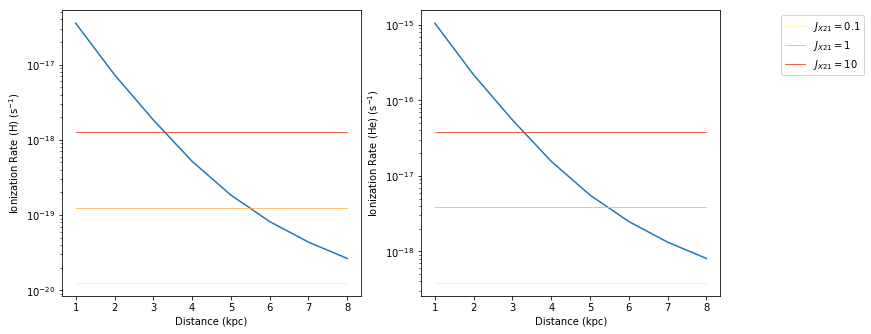

In [7]:
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.figure(figsize=(12, 4.5))
plt.subplot(121)
plt.plot(np.arange(8) + 1, ip_H)

ip_model_H = Ion_p(H, He, H)
plt.plot([1, 8], [ip_model_H / 10, ip_model_H / 10],
         label='$J_{X21}=0.1$',
         color='#ffeda0',
         lw=0.8)
plt.plot([1, 8], [ip_model_H, ip_model_H],
         label='$J_{X21}=1$',
         color='#feb24c',
         lw=0.8)
plt.plot([1, 8], [ip_model_H * 10, ip_model_H * 10],
         label='$J_{X21}=10$',
         color='#f03b20',
         lw=0.8)
plt.yscale('log')
plt.xlabel('Distance (kpc)')
plt.ylabel('Ionization Rate (H) (s$^{-1}$)')
#plt.legend(bbox_to_anchor=(1.5,1))
#plt.title(Dat2[0].title(distance = False, alpha = True, beta = True, mdot = True))

plt.subplot(122)
plt.plot(np.arange(8) + 1, ip_He)

ip_model_He = Ion_p(H, He, He)
plt.plot([1, 8], [ip_model_He / 10, ip_model_He / 10],
         label='$J_{X21}=0.1$',
         color='#ffeda0',
         lw=0.8)
plt.plot([1, 8], [ip_model_He, ip_model_He],
         label='$J_{X21}=1$',
         color='#feb24c',
         lw=0.8)
plt.plot([1, 8], [ip_model_He * 10, ip_model_He * 10],
         label='$J_{X21}=10$',
         color='#f03b20',
         lw=0.8)
plt.yscale('log')
plt.xlabel('Distance (kpc)')
plt.ylabel('Ionization Rate (He) (s$^{-1}$)')
plt.legend(bbox_to_anchor=(1.5, 1))
#plt.title(Dat2[0].title(distance = False, alpha = True, beta = True, mdot = True))
plt.tight_layout(0.2)
plt.show()

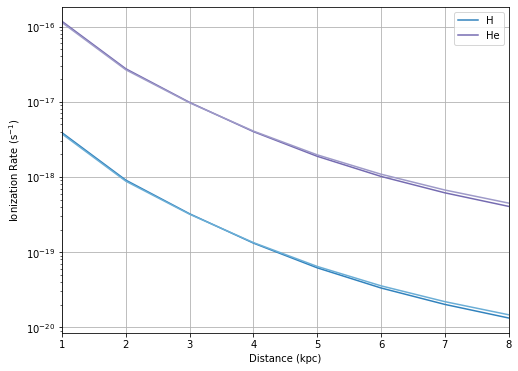

In [44]:
dic = {'alpha': 0.1, 'beta': 100, 'mdot': 3}
Dat2 = compare(np.arange(8) + 1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(8) + 1, ip_H, label='H', color=col1[1])
plt.plot(np.arange(8) + 1, ip_He, label='He', color=col3[1])

dic = {'alpha': 0.1, 'beta': 100, 'mdot': 1}
Dat2 = compare(np.arange(8) + 1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.plot(np.arange(8) + 1, ip_H, color=col1[2])
plt.plot(np.arange(8) + 1, ip_He, color=col3[2])

'''dic = {'alpha': 0.1, 'beta': 100, 'mdot': 0.5}
Dat2 = compare(np.arange(8) + 1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.plot(np.arange(8) + 1, ip_H, color=col1[4])
plt.plot(np.arange(8) + 1, ip_He, color=col3[4])'''
plt.yscale('log')
plt.legend()
plt.xlabel('Distance (kpc)')
plt.ylabel('Ionization Rate (s$^{-1}$)')
plt.xlim(1, 8)
plt.grid()
plt.show()

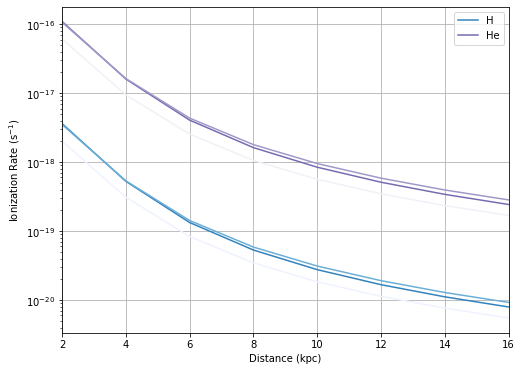

In [41]:
dic = {'alpha': 0.1, 'beta': 100, 'mdot': 3} #Jieying
Dat2 = compare((np.arange(8) + 1) * 2, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.figure(figsize=(8, 6))
plt.plot((np.arange(8) + 1) * 2, ip_H, label='H', color=col1[1])
plt.plot((np.arange(8) + 1) * 2, ip_He, label='He', color=col3[1])

dic = {'alpha': 0.1, 'beta': 100, 'mdot': 1}
Dat2 = compare((np.arange(8) + 1) * 2, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.plot((np.arange(8) + 1) * 2, ip_H, color=col1[2])
plt.plot((np.arange(8) + 1) * 2, ip_He, color=col3[2])

dic = {'alpha': 0.1, 'beta': 100, 'mdot': 0.5}
Dat2 = compare((np.arange(8) + 1) * 2, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.plot((np.arange(8) + 1) * 2, ip_H, color=col1[4])
plt.plot((np.arange(8) + 1) * 2, ip_He, color=col3[4])
plt.yscale('log')
plt.legend()
plt.xlabel('Distance (kpc)')
plt.ylabel('Ionization Rate (s$^{-1}$)')
plt.xlim(2, 16)
plt.grid()
plt.show()

## Plot $F_\nu-E$

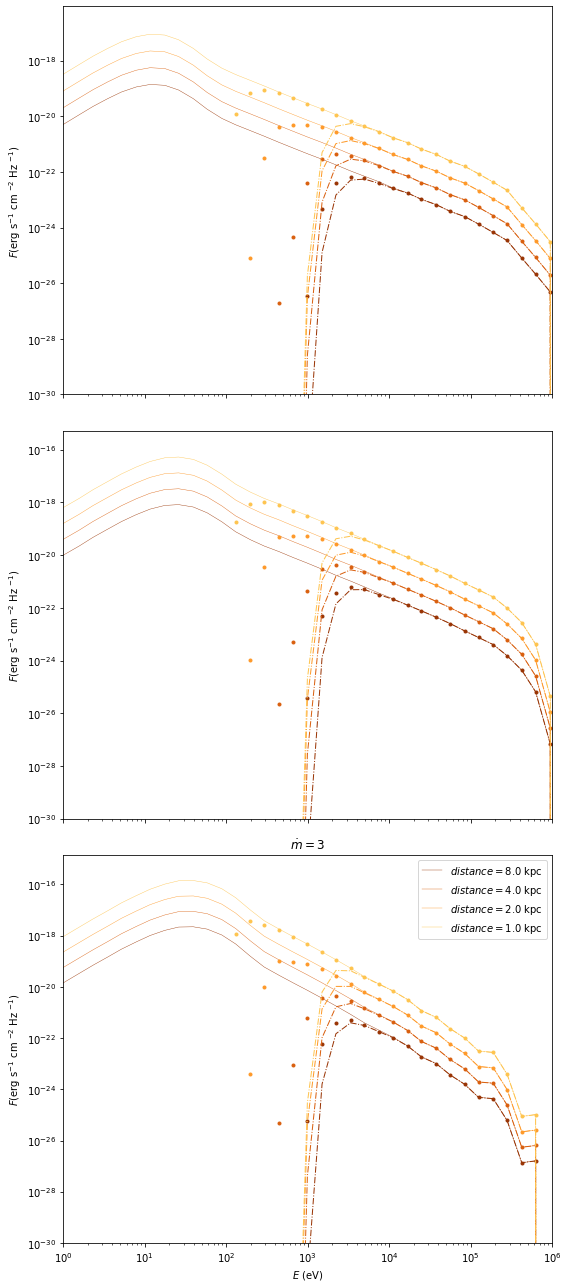

In [4]:
f, ax = plt.subplots(3, 1, figsize=(8, 18), sharex=True)
ax = ax.flatten()
Mdot = [0.1, 1, 3]
for index in range(3):
    Dat = compare([1, 2, 4, 8],
                  dic={
                      'alpha': 0.1,
                      'beta': 100,
                      'mdot': Mdot[index]
                  })
    for c, i in enumerate(Dat):
        draw_Fnu(i, col3[c], col2[c], col2[c], absorb=True, ax=ax[index])
        #draw_Fnu_model()
    #ax[index].set_ylim([1e-30, 1e-14])
    ax[index].set_xlim([1e0, 1e6])
    plt.title(r'$\dot m={}$'.format(str(Mdot[index])))
    ax[index].set_xlabel('')
ax[2].set_xlabel('$E$ (eV)')
plt.legend()
plt.tight_layout()
#plt.savefig('2_2_1_1.eps')

## Plot $\nu F_\nu-\nu$
- $\alpha=0.1, \beta=100, \dot m=3$
- Deep blue line is a standard model which obeys a power law
- Pale blue lines are fluxes in different distances from the SMBH
- Each dash line is the flux which have gone through the absorption both in galactic disk and in the molecular cloud

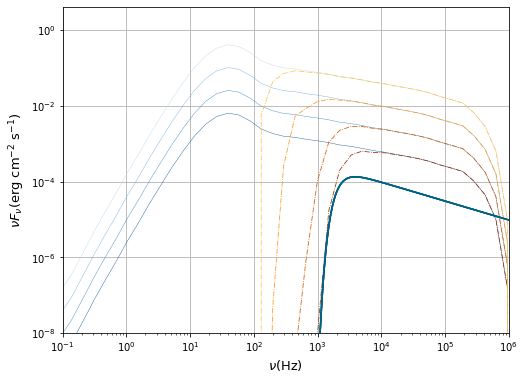

In [49]:
c = 0
plt.figure(figsize=(8,6))
Dat = compare(distance, dic)
for i in Dat:
    draw_nuF(i, col1[c], col2[c])
    draw_nuF_model()
    c += 1
#plt.legend(bbox_to_anchor=(1.5,1))
#plt.savefig('1.eps')
plt.grid()
plt.show()

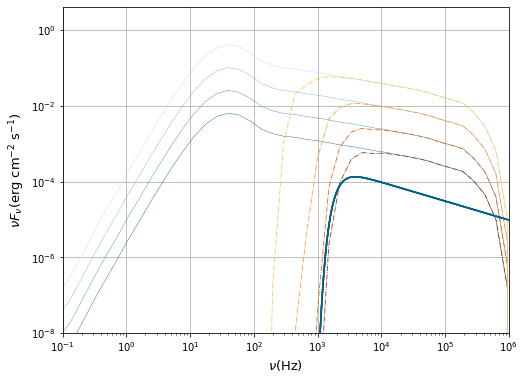

In [51]:
c = 0 #Jieying Liu
Dat = compare(distance*2, dic)
plt.figure(figsize=(8,6))
for i in Dat:
    draw_nuF(i, col1[c], col2[c])
    draw_nuF_model()
    c += 1
#plt.legend(bbox_to_anchor=(1.5,1))
#plt.savefig('1.eps')
plt.grid()
plt.show()

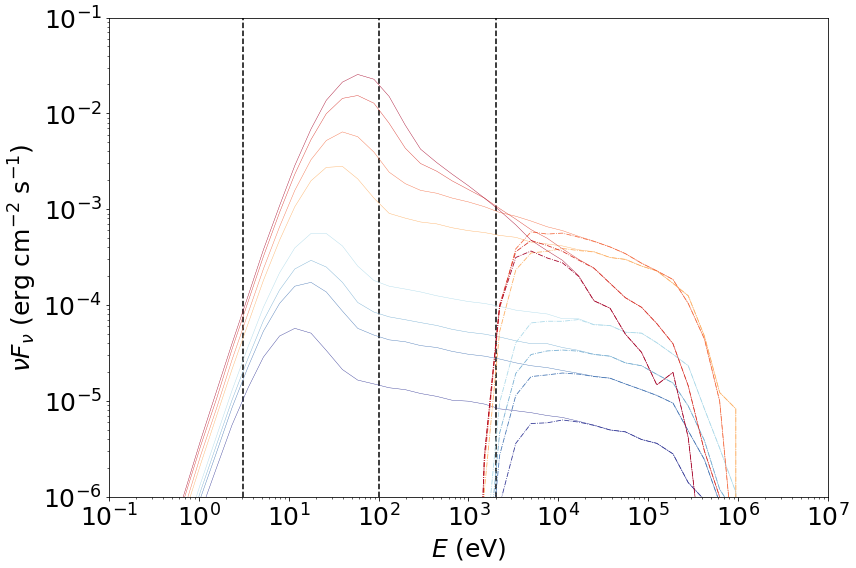

In [15]:
plt.figure(figsize=(12, 8))
c = [
    '#a50026', '#d73027', '#f46d43', '#fdae61', '#abd9e9', '#74add1',
    '#4575b4', '#313695'
][::-1]
for i, md in enumerate(
        np.array([3.0, 2.0, 1.0, 0.5, 0.1, 0.05, 0.03, 0.01])[::-1]):
    Dat = compare([16], dic={'alpha': 0.1, 'beta': 100, 'mdot': md})
    draw_nuF(Dat[0], c[i], c[i])
plt.xlabel(r'$E$ (eV)', fontsize=25)
plt.ylabel(r'$\nu F_\nu$ (erg cm$^{-2}$ s$^{-1}$)', fontsize=25)
plt.vlines(3.10, 1e-8, 1e0, linestyle='--')
plt.vlines(100, 1e-8, 1e0, linestyle='--')
plt.vlines(2000, 1e-8, 1e0, linestyle='--')
plt.tick_params(labelsize=25)
plt.xlim([1e-1, 1e7])
plt.ylim([1e-6, 1e-1])
plt.tight_layout()

## Plot $\nu L_\nu-\nu$

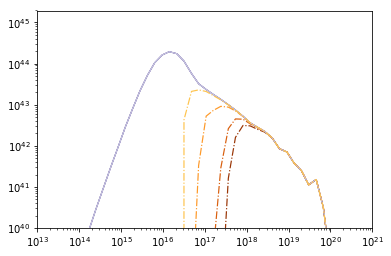

In [12]:
c = 0
for i in Dat:
    draw_nuL(i, [col3[c], col2[c]])
    #draw_nuL_model()
    c += 1
#plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

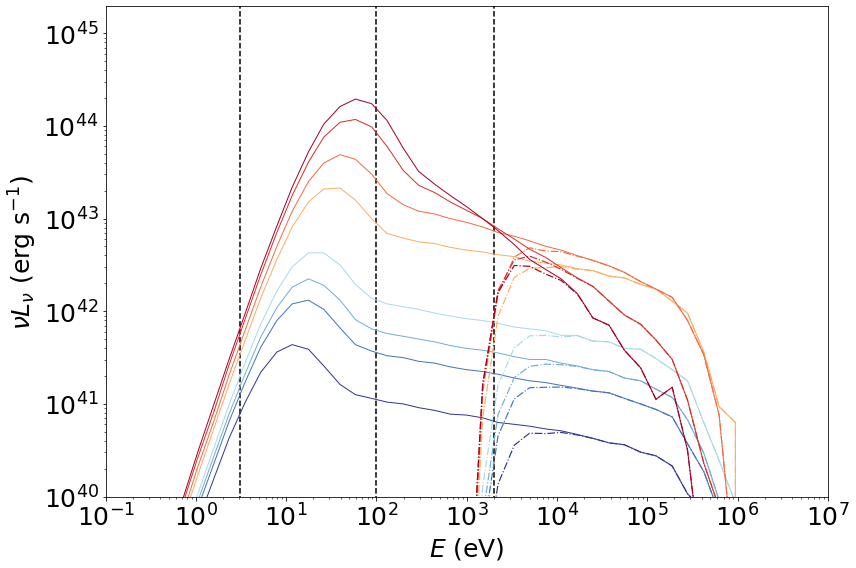

In [10]:
plt.figure(figsize=(12,8))
c = ['#a50026','#d73027','#f46d43','#fdae61','#abd9e9','#74add1','#4575b4','#313695'][::-1]
i = 0
for md in np.array([3.0,2.0,1.0,0.5,0.1,0.05,0.03,0.01])[::-1]:
    Dat = compare([8], dic={'alpha':0.1, 'beta':100, 'mdot':md})
    draw_nuL(Dat[0], np.array([c[i], c[i]]), xlabel = 'eV')
    i += 1
plt.xlabel(r'$E$ (eV)', fontsize = 25)
plt.ylabel(r'$\nu L_\nu$ (erg s$^{-1}$)', fontsize = 25)
plt.vlines(3.10, 1e39, 1e46, linestyle = '--')
plt.vlines(100, 1e39, 1e46, linestyle = '--')
plt.vlines(2000, 1e39, 1e46, linestyle = '--')
plt.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('nuF1_8_abs.eps')

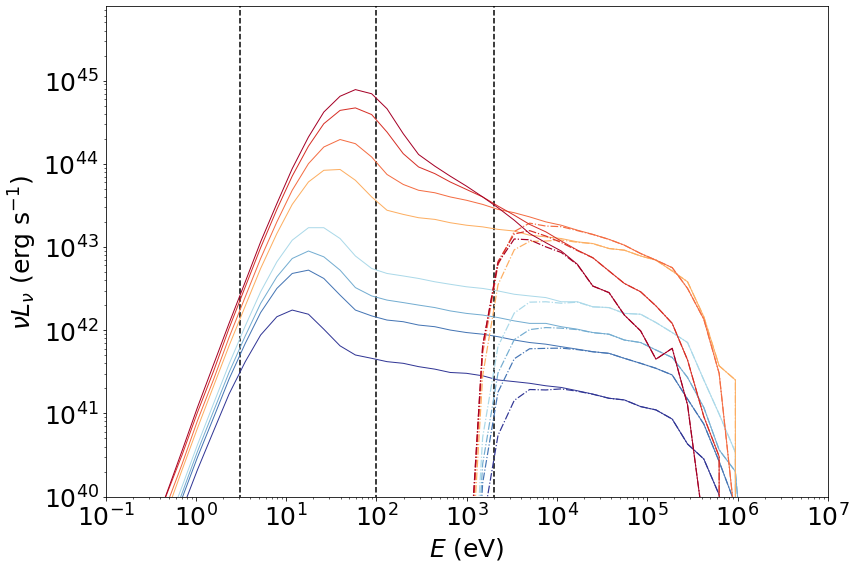

In [43]:
#revise the X-ray luminosity (*4) //Jieying Liu
plt.figure(figsize=(12,8))
c = ['#a50026','#d73027','#f46d43','#fdae61','#abd9e9','#74add1','#4575b4','#313695'][::-1]
i = 0
for md in np.array([3.0,2.0,1.0,0.5,0.1,0.05,0.03,0.01])[::-1]:
    Dat = compare([8], dic={'alpha':0.1, 'beta':100, 'mdot':md})
    draw_nuL(Dat[0], np.array([c[i], c[i]]), xlabel = 'eV')
    i += 1
plt.xlabel(r'$E$ (eV)', fontsize = 25)
plt.ylabel(r'$\nu L_\nu$ (erg s$^{-1}$)', fontsize = 25)
plt.vlines(3.10, 1e39, 1e46, linestyle = '--')
plt.vlines(100, 1e39, 1e46, linestyle = '--')
plt.vlines(2000, 1e39, 1e46, linestyle = '--')
plt.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('nuF1_8_abs.eps')

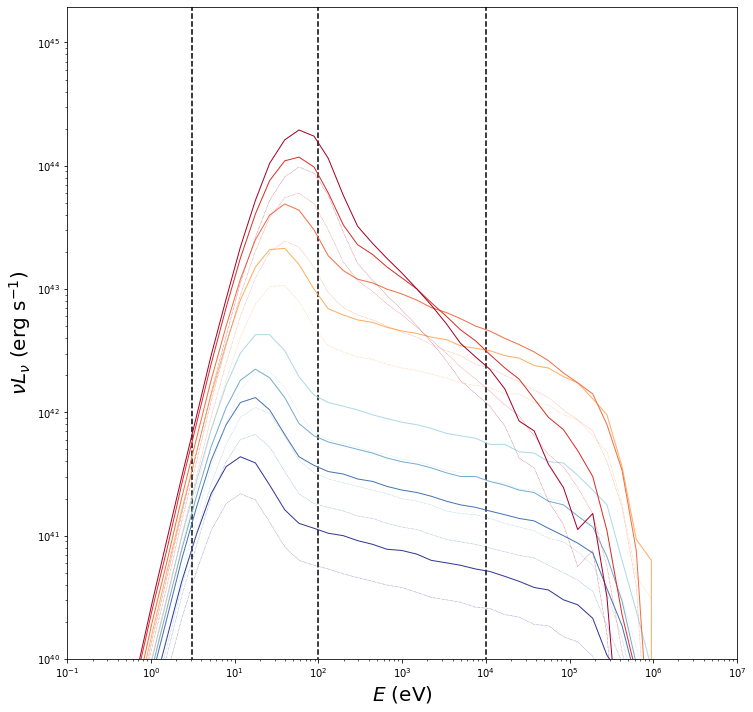

In [28]:
i = 0
plt.figure(figsize=(12,12))
for md in np.array([3.0,2.0,1.0,0.5,0.1,0.05,0.03,0.01])[::-1]:
    Dat = compare([8], dic={'alpha':0.1, 'beta':100, 'mdot':md})
    draw_nuL(Dat[0], np.array([c[i]]), xlabel = 'eV')
    i += 1
plt.xlabel(r'$E$ (eV)', fontsize = 20)
plt.ylabel(r'$\nu L_\nu$ (erg s$^{-1}$)', fontsize = 20)
plt.vlines(3.10, 1e39, 1e46, linestyle = '--')
plt.vlines(100, 1e39, 1e46, linestyle = '--')
plt.vlines(10000, 1e39, 1e46, linestyle = '--')
plt.savefig('nuF1_8.eps')